In [ ]:
# https://www.machinecurve.com/index.php/2021/02/03/how-to-use-k-fold-cross-validation-with-pytorch/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd /content/gdrive/My Drive/ZFDataset/

/content/gdrive/My Drive/ZFDataset


In [ ]:
import os
import sys
import tempfile
import pathlib
from io import BytesIO
import base64
import pandas as pd

import numpy as np
from PIL import Image, ImageOps

from matplotlib import cm

from scipy import ndimage as ndi
from skimage import io, filters, measure, morphology, img_as_ubyte
import pandas as pd
from sklearn import decomposition, manifold

In [ ]:
base_path = '/content/gdrive/My Drive/ZFDataset/'

In [ ]:
# syllable_df_Nest_Total = pd.read_pickle(base_path+Nest_analysis+'_Densenet121.pkl')
# syllable_df_Nest_Total1 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest4_Densenet121.pkl')
# syllable_df_Nest_Total2 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest5_Densenet121.pkl')

In [ ]:
# syllable_df_Nest_Total1 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest1_Densenet121.pkl')
# syllable_df_Nest_Total1['Nest'] = "Nest1"
syllable_df_Nest_Total2 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest2_Densenet121.pkl')
syllable_df_Nest_Total2['Nest'] = "Nest2"
syllable_df_Nest_Total3 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest3_Densenet121.pkl')
syllable_df_Nest_Total3['Nest'] = "Nest3"
syllable_df_Nest_Total4 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest4_Densenet121.pkl')
syllable_df_Nest_Total4['Nest'] = "Nest4"
syllable_df_Nest_Total5 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest5_Densenet121.pkl')
syllable_df_Nest_Total5['Nest'] = "Nest5"
syllable_df_Nest_Total6 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest6_Densenet121.pkl')
syllable_df_Nest_Total6['Nest'] = "Nest6"
syllable_df_Nest_Total7 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest7_Densenet121.pkl')
syllable_df_Nest_Total7['Nest'] = "Nest7"
syllable_df_Nest_Total8 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest8_Densenet121.pkl')
syllable_df_Nest_Total8['Nest'] = "Nest8"
syllable_df_Nest_Total9 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest9_Densenet121.pkl')
syllable_df_Nest_Total9['Nest'] = "Nest9"
syllable_df_Nest_Total10 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest10_Densenet121.pkl')
syllable_df_Nest_Total10['Nest'] = "Nest10"
syllable_df_Nest_Total11 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest11_Densenet121.pkl')
syllable_df_Nest_Total11['Nest'] = "Nest11"

In [ ]:
# syllable_df_Nest_Total = pd.concat([syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5], ignore_index=True)
syllable_df_Nest_Total = pd.concat([syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5,
                                    syllable_df_Nest_Total6, syllable_df_Nest_Total7, syllable_df_Nest_Total8, syllable_df_Nest_Total9, syllable_df_Nest_Total10, syllable_df_Nest_Total11], ignore_index=True)
del syllable_df_Nest_Total11, syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5
del syllable_df_Nest_Total6, syllable_df_Nest_Total7, syllable_df_Nest_Total8, syllable_df_Nest_Total9, syllable_df_Nest_Total10

In [ ]:
syllable_df_Nest_Total.drop(columns=['audio', 'spectrogram'], inplace=True)

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2
...,...,...,...,...,...,...,...,...,...,...
23050,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11
23051,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11
23052,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11
23053,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11


In [ ]:
# Tutor_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["ivoj", "nzen", "xsup", "gthh", "ttog", "isab", "ixea", "ihza", "zegf", "sjew"])].reset_index(drop=True)
Tutor_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["ivoj", "nzen", "xsup", "gthh", "ttog", "isab", "ixea", "ihza", "zegf", "sjew", "cgby"])].reset_index(drop=True)

In [ ]:
Pupil_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["hphi", "cyea", "phpd", "cxyc", "qfod", "nsrn", "khxv", "oogw", "kcos", "tbfk", "kccr", "bbyj", "onsu", "vusu", "kfgj", "inji", "hsew", "sdhp", "vstd"])].reset_index(drop=True)

In [ ]:
Tutor_dataset

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.141369,0.163840,i,nzen,1,nzen_0000,44100,nzen_i,"[0.000281047, 0.006896307, 0.0021862306, 0.003...",Nest2
1,0.226426,0.290575,i,nzen,2,nzen_0000,44100,nzen_i,"[0.0003058371, 0.005542181, 0.0023643032, 0.00...",Nest2
2,0.388081,0.453342,i,nzen,3,nzen_0000,44100,nzen_i,"[0.0002870175, 0.0060381475, 0.0023333135, 0.0...",Nest2
3,0.487174,0.550757,j,nzen,4,nzen_0000,44100,nzen_j,"[0.0003228713, 0.0052634007, 0.0023634112, 0.0...",Nest2
4,0.579305,0.642185,a,nzen,5,nzen_0000,44100,nzen_a,"[0.00028934886, 0.0054234248, 0.00228799, 0.00...",Nest2
...,...,...,...,...,...,...,...,...,...,...
7176,10.182711,10.273732,0,cgby,39,cgby_0032,44100,cgby_0,"[0.0003101198, 0.0023758058, 0.00217167, 0.003...",Nest11
7177,10.322530,10.421079,0,cgby,40,cgby_0032,44100,cgby_0,"[0.00037552853, 0.004450283, 0.0019465615, 0.0...",Nest11
7178,10.451782,10.581827,0,cgby,41,cgby_0032,44100,cgby_0,"[0.00045851385, 0.0021333802, 0.0020485146, 0....",Nest11
7179,10.640036,10.822507,0,cgby,42,cgby_0032,44100,cgby_0,"[0.00029902745, 0.0032967748, 0.0025172085, 0....",Nest11


In [ ]:
Pupil_dataset

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2
...,...,...,...,...,...,...,...,...,...,...
15869,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11
15870,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11
15871,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11
15872,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11


In [ ]:
import torch
import torch.nn as nn
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
le = LabelEncoder()

In [ ]:
# le.fit(syllable_df_Nest_Total['indv'].to_list())
le.fit(syllable_df_Nest_Total['Nest'].to_list())

LabelEncoder()

In [ ]:
# targets = le.transform(syllable_df_Nest_Total['indv'].to_list())
targets = le.transform(syllable_df_Nest_Total['Nest'].to_list())

In [ ]:
targets

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
list(le.classes_)

['Nest10',
 'Nest11',
 'Nest2',
 'Nest3',
 'Nest4',
 'Nest5',
 'Nest6',
 'Nest7',
 'Nest8',
 'Nest9']

In [ ]:
syllable_df_Nest_Total['indv_encoded'] = targets

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest,indv_encoded
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2,2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2,2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2,2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2,2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2,2
...,...,...,...,...,...,...,...,...,...,...,...
23050,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11,1
23051,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11,1
23052,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11,1
23053,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11,1


In [ ]:
max_sequence_length = syllable_df_Nest_Total['indvi'].max()

In [ ]:
current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']

In [ ]:
current_songfile

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest,indv_encoded


In [ ]:
def create_sequence_feature(syllable_df_Nest_Total, given_key, encoder, label_select='indv'):
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]
    sequence_length = current_songfile['indvi'].values[-1]
    temp_list = current_songfile['densenet121_features'].to_list()
    label = encoder.transform(current_songfile[label_select].values)[-1]
    # for k in range(sequence_length,max_sequence_length):
    #   temp_list.append(np.zeros(len(temp_list[0])))
    return [temp_list, sequence_length], label

In [ ]:
# current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']

In [ ]:
# unique_indv = syllable_df_Nest_Total.indv.unique()

In [ ]:
def data_splitting_based_on_sample_size(syllable_df_Nest_Total):
  Label_Total = []
  Nest_Total = []

  for key in syllable_df_Nest_Total.key.unique():
    Label_Total.append(syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]['indv'].values[0])
    Nest_Total.append(syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]['Nest'].values[0])

  le = LabelEncoder()
  le.fit(Nest_Total)

  targets = le.transform(Nest_Total)

  encoded_targets = pd.DataFrame({'targets' : targets,
        'indvi' : Label_Total,
        'key' : syllable_df_Nest_Total.key.unique(),
        'Nest' : Nest_Total})

  # train_indices, test_indices = train_test_split(np.arange(targets.shape[0]), train_size=train_test_split_ratio, stratify=targets)

  # train_keys = encoded_targets.loc[train_indices]['key'].to_list()

  # test_keys = encoded_targets.loc[test_indices]['key'].to_list()

  # return encoded_targets, train_keys, test_keys, le
  return encoded_targets, le

In [ ]:
# Training on Tutor set
# encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)
# Training on Pupil set
encoded_targets, le = data_splitting_based_on_sample_size(Pupil_dataset)
# encoded_targets, le = data_splitting_based_on_sample_size(syllable_df_Nest_Total)

In [ ]:
le.classes_

array(['Nest10', 'Nest11', 'Nest2', 'Nest3', 'Nest4', 'Nest5', 'Nest6',
       'Nest7', 'Nest8', 'Nest9'], dtype='<U6')

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,2,cxyc,cxyc_0000,Nest2
1,2,cxyc,cxyc_0001,Nest2
2,2,cxyc,cxyc_0002,Nest2
3,2,cxyc,cxyc_0003,Nest2
4,2,cxyc,cxyc_0004,Nest2
...,...,...,...,...
519,1,vstd,vstd_0023,Nest11
520,1,vstd,vstd_0024,Nest11
521,1,vstd,vstd_0015,Nest11
522,1,sdhp,sdhp_0004,Nest11


In [ ]:
# Shuffling the training dataset
encoded_targets = encoded_targets.sample(frac=1, random_state=2021).reset_index(drop=True)

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,8,kfgj,kfgj_0012,Nest8
1,3,khxv,khxv_0046,Nest3
2,7,onsu,onsu_0007,Nest7
3,1,sdhp,sdhp_0020,Nest11
4,2,nsrn,nsrn_0007,Nest2
...,...,...,...,...
519,2,nsrn,nsrn_0017,Nest2
520,3,khxv,khxv_0042,Nest3
521,2,nsrn,nsrn_0030,Nest2
522,6,kccr,kccr_0000,Nest6


In [ ]:
# Creating the sequences
# X_train = []; X_test =[];
# y_train = []; y_test =[];
X_total = []; y_total = [];

# for key_indv in unique_indv:
#   newkeys = syllable_df_Nest_Total[syllable_df_Nest_Total['indv']==key_indv].key.unique()
#   for key in newkeys:
#     data, label = create_sequence_feature(syllable_df_Nest_Total, key)
#     Nest_feature_set_padded.append(data)
#     Label_set.append(label)

for key in encoded_targets['key'].unique():# [:10]:
    print(key)
    data, label = create_sequence_feature(syllable_df_Nest_Total, key, le, label_select='Nest')
    X_total.append(data)
    y_total.append(label)
    # if key in train_keys:
    #   X_train.append(data)
    #   y_train.append(label)
    # elif key in test_keys:
    #   X_test.append(data)
    #   y_test.append(label)
    # else:
    #   print(key, "Not Found")

cxyc_0000
cxyc_0001
cxyc_0002
cxyc_0003
cxyc_0004
cxyc_0005
cxyc_0006
cxyc_0007
cxyc_0008
cxyc_0009
cxyc_0010
cxyc_0011
cxyc_0012
cxyc_0013
cxyc_0014
cxyc_0015
cxyc_0016
cxyc_0017
cxyc_0018
cxyc_0019
cxyc_0020
cxyc_0021
cxyc_0022
cxyc_0023
cxyc_0024
cxyc_0025
cxyc_0026
nsrn_0000
nsrn_0001
nsrn_0002
nsrn_0003
nsrn_0004
nsrn_0005
nsrn_0006
nsrn_0007
nsrn_0008
nsrn_0009
nsrn_0010
nsrn_0011
nsrn_0012
nsrn_0013
nsrn_0014
nsrn_0015
nsrn_0016
nsrn_0017
nsrn_0018
nsrn_0019
nsrn_0020
nsrn_0021
nsrn_0022
nsrn_0023
nsrn_0024
nsrn_0025
nsrn_0026
nsrn_0027
nsrn_0028
nsrn_0029
nsrn_0030
nsrn_0031
nsrn_0032
nsrn_0033
nsrn_0034
nsrn_0035
nsrn_0036
nsrn_0037
qfod_0000
qfod_0001
qfod_0002
qfod_0003
qfod_0004
qfod_0005
qfod_0006
qfod_0007
qfod_0008
qfod_0009
qfod_0010
qfod_0011
qfod_0012
qfod_0013
qfod_0014
qfod_0015
qfod_0016
qfod_0017
qfod_0018
qfod_0019
qfod_0020
khxv_0000
khxv_0001
khxv_0002
khxv_0003
khxv_0004
khxv_0005
khxv_0006
khxv_0007
khxv_0008
khxv_0009
khxv_0010
khxv_0011
khxv_0012
khxv_0013


In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.tensor(self.X[idx][0]), self.y[idx], self.X[idx][1]
        # return torch.tensor(self.X[idx]), self.y[idx]

In [ ]:
Counter(y_total)

Counter({0: 7, 1: 61, 2: 86, 3: 84, 4: 32, 5: 39, 6: 107, 7: 57, 8: 30, 9: 21})

In [ ]:
num_occurences = encoded_targets.groupby(['Nest','targets']).nunique()

In [ ]:
num_occurences

,,indvi,key
Nest,targets,,
Nest10,0,1,7
Nest11,1,2,61
Nest2,2,3,86
Nest3,3,2,84
Nest4,4,1,32
Nest5,5,1,39
Nest6,6,2,107
Nest7,7,2,57
Nest8,8,1,30


In [ ]:
# class_weights = torch.tensor(num_occurences['key'].min()/num_occurences['key'].values, dtype=float)
# for i in range(num_occurences.shape[0]):
#   class_weights.append(num_occurences['key'][0]/num_occurences['key'].min())
class_weights = num_occurences['key'].min()/num_occurences['key'].values

In [ ]:
class_weights

array([1.        , 0.1147541 , 0.08139535, 0.08333333, 0.21875   ,
       0.17948718, 0.06542056, 0.12280702, 0.23333333, 0.33333333])

In [ ]:
len(le.classes_)

10

In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    # def __init__(self, vocab_size, embedding_dim, hidden_dim) :
    def __init__(self, embedding_dim, hidden_dim, output_dim, num_layers) :
        super().__init__()
        # self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bias=True)
        self.linear = nn.Linear(hidden_dim, output_dim, bias=True) # Bias = true # Try by setting last layer bias to False
        # self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        # x = self.embeddings(x)
        # x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
class LSTM_fixed_len_bidir(torch.nn.Module) :
    # def __init__(self, vocab_size, embedding_dim, hidden_dim) :
    def __init__(self, embedding_dim, hidden_dim, output_dim, num_layers) :
        super().__init__()
        # self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bias=True, bidirectional=True)
        self.linear = nn.Linear(hidden_dim, output_dim, bias=True) # Bias = true
        # self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        # x = self.embeddings(x)
        # x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
# model =  LSTM_fixed_len(1024, 16, len(le.classes_), 2)

In [ ]:
# model.eval()

In [ ]:
# encoded_targets_test, le_test = data_splitting_based_on_sample_size(Pupil_dataset)
encoded_targets_test, le_test = data_splitting_based_on_sample_size(Tutor_dataset)   ### Change here if swtiching Trainig set from Tutor to Pupil

X_test = []; y_test = [];

for key in encoded_targets_test['key'].unique():# [:10]:
    print(key)
    # data, label = create_sequence_feature(Pupil_dataset, key, le, label_select='Nest')
    data, label = create_sequence_feature(Tutor_dataset, key, le, label_select='Nest')  ### Change here if swtiching Trainig set from Tutor to Pupil
    X_test.append(data)
    y_test.append(label)

test_ds = ReviewsDataset(X_test, y_test)

nzen_0000
nzen_0001
nzen_0002
nzen_0003
nzen_0004
nzen_0005
nzen_0006
nzen_0007
nzen_0008
nzen_0009
nzen_0010
nzen_0011
nzen_0012
nzen_0013
nzen_0014
nzen_0015
nzen_0016
xsup_0000
xsup_0001
xsup_0002
xsup_0003
xsup_0004
xsup_0005
xsup_0006
xsup_0007
xsup_0008
xsup_0009
xsup_0010
xsup_0011
xsup_0012
xsup_0013
xsup_0014
xsup_0015
xsup_0016
xsup_0017
xsup_0018
xsup_0019
xsup_0020
xsup_0021
xsup_0022
xsup_0023
xsup_0024
xsup_0025
xsup_0026
xsup_0027
xsup_0028
xsup_0029
xsup_0030
xsup_0031
xsup_0032
xsup_0033
xsup_0034
xsup_0035
xsup_0036
xsup_0037
xsup_0038
gthh_0011
gthh_0033
gthh_0022
gthh_0015
gthh_0007
gthh_0031
gthh_0012
gthh_0000
gthh_0010
gthh_0013
gthh_0023
gthh_0009
gthh_0006
gthh_0001
gthh_0019
gthh_0004
gthh_0024
gthh_0008
gthh_0021
gthh_0005
gthh_0032
gthh_0003
gthh_0002
gthh_0028
gthh_0016
gthh_0029
gthh_0025
gthh_0020
gthh_0017
gthh_0026
gthh_0014
gthh_0027
gthh_0030
ttog_0012
ttog_0011
ttog_0024
ttog_0006
ttog_0032
ttog_0005
ttog_0016
ttog_0003
ttog_0029
ttog_0018
ttog_0014


In [ ]:
num_occurences_test = encoded_targets_test.groupby(['Nest','targets']).nunique()

class_weights_test = num_occurences_test['key'].min()/num_occurences_test['key'].values

In [ ]:
num_occurences_test

,,indvi,key
Nest,targets,,
Nest10,0,1,26
Nest11,1,1,49
Nest2,2,1,17
Nest3,3,1,39
Nest4,4,1,33
Nest5,5,1,37
Nest6,6,1,28
Nest7,7,1,35
Nest8,8,1,29


In [ ]:
class_weights_test

array([0.65384615, 0.34693878, 1.        , 0.43589744, 0.51515152,
       0.45945946, 0.60714286, 0.48571429, 0.5862069 , 0.53125   ])

In [ ]:
kf = KFold(n_splits  = 10)

In [ ]:
random_number_set = [3859,
 7857,
 7980,
 2999,
 3324,
 1778,
 329,
 5689,
 2746,
 8964,
 70,
 4786,
 2816,
 2405,
 2681,
 5769,
 9327,
 7867,
 4469,
 4928,
 5730,
 858,
 6775,
 5487,
 1464,
 7365,
 4313,
 9324,
 8958,
 7663,
 5362,
 299,
 4931,
 4906,
 5007,
 5848,
 5119,
 7172,
 6862,
 3981,
 8262,
 5441,
 4702,
 4177,
 2611,
 6342,
 9402,
 5609,
 3590,
 5397,
 7172,
 6862,
 3981,
 8262,
 5441,
 4702,
 4177,
 2611,
 6342,
 9402,
 5609,
 3590,
 5397];

In [ ]:
# random_number_set = [2020];
# for iter, current_random_number in enumerate(random_number_set):

#   encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)
#   encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)
#   print(encoded_targets)
#   X_total = []; y_total = [];

#   for key in encoded_targets['key'].unique():
#     data, label = create_sequence_feature(syllable_df_Nest_Total, key, le, label_select='Nest')
#     X_total.append(data)
#     y_total.append(label)

     targets indvi        key    Nest
0          0  sjew  sjew_0009  Nest10
1          1  cgby  cgby_0042  Nest11
2          6  isab  isab_0011   Nest6
3          2  nzen  nzen_0001   Nest2
4          7  ixea  ixea_0016   Nest7
..       ...   ...        ...     ...
320        5  ttog  ttog_0002   Nest5
321        5  ttog  ttog_0024   Nest5
322        8  ihza  ihza_0014   Nest8
323        5  ttog  ttog_0036   Nest5
324        1  cgby  cgby_0012  Nest11

[325 rows x 4 columns]


In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest,indv_encoded
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2,2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2,2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2,2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2,2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2,2
...,...,...,...,...,...,...,...,...,...,...,...
23050,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11,1
23051,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11,1
23052,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11,1
23053,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11,1


In [ ]:
#  for iter, (x, y, l) in enumerate(train_ds):
#    y = torch.tensor(y).long().resize_((1))
#    print(x.shape, y.shape[0])

In [ ]:
def dataset_shuffling(encoded_targets, syllable_df, encoder, current_random_number):
  encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)

  X_total = []; y_total = [];

  for key in encoded_targets['key'].unique():
    data, label = create_sequence_feature(syllable_df, key, encoder, label_select='Nest')
    X_total.append(data)
    y_total.append(label)

  train_ds = ReviewsDataset(X_total, y_total)

  return train_ds

In [ ]:
# encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,2,cxyc,cxyc_0000,Nest2
1,2,cxyc,cxyc_0001,Nest2
2,2,cxyc,cxyc_0002,Nest2
3,2,cxyc,cxyc_0003,Nest2
4,2,cxyc,cxyc_0004,Nest2
...,...,...,...,...
519,1,vstd,vstd_0023,Nest11
520,1,vstd,vstd_0024,Nest11
521,1,vstd,vstd_0015,Nest11
522,1,sdhp,sdhp_0004,Nest11


In [ ]:
current_random_number

2020

In [ ]:
train_index

In [ ]:
np.random.shuffle(train_index)

In [ ]:
train_index

In [ ]:
random_number_set = [32]

In [ ]:
# Final Architecture Set and random seed change
# random_number_set_single = [64];

epochs = 200; lr = 0.001;

df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Loss', 'Test Accuracy'])
overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Test Accuracy', 'Test Accuracy Equal Weight'])
Total_valid_loss = []
Total_test_loss = []

def validation_metrics (model, valid_dl, class_weights):
  model.eval()
  test_correct = 0
  test_total = 0
  test_sum_loss = 0.0
  test_sum_rmse = 0.0
  actual_label = []
  predicted_label = []
  for x, y, l in valid_dl:
      x = x.float()
      x.resize_((1,x.shape[0],x.shape[1]))
      #indv_class_weight = class_weights[y]
      indv_class_weight = 1
      y = torch.tensor(y).long().resize_((1))
      # y_hat = model(x, l)
      y_hat = model(x)
      loss = F.cross_entropy(y_hat, y)
      pred = torch.max(y_hat, 1)[1]
      # print(y, pred)
      test_correct += (pred == y).float().sum()
      test_total += y.shape[0]
      test_sum_loss += loss.item()*indv_class_weight*y.shape[0]
      test_sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
      actual_label.extend(y.numpy())
      predicted_label.extend(pred.numpy())
  conf_mat = confusion_matrix(actual_label, predicted_label)
  Equal_Weight_Nest_Acc = Nest_Equal_weight_accuracy(conf_mat)
  # print(conf_mat)
  return test_sum_loss/test_total, test_correct/test_total, test_sum_rmse/test_total, conf_mat, Equal_Weight_Nest_Acc

def Nest_Equal_weight_accuracy(confusion_matrix):
  Nest_sum = confusion_matrix.sum(axis=1)
  Indv_Nest_Acc = [];
  for i in range(0, Nest_sum.shape[0]):
    Indv_Nest_Acc.append(confusion_matrix[i, i]/Nest_sum[i])
    # print(confusion_matrix[i, i]/Nest_sum[i])
  return np.mean(Indv_Nest_Acc)

for iter, current_random_number in enumerate(random_number_set):

  print('Random Number', current_random_number)

  encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)   ### CHANGE HERE FOR TUTOR OR PUPIL DATASET FOR TRAINING
  encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)

  ### SHUFFLING OVER 
  X_total = []; y_total = [];  

  for key in encoded_targets['key'].unique():
    data, label = create_sequence_feature(Tutor_dataset, key, le, label_select='Nest') ### CHANGE HERE FOR TUTOR OR PUPIL DATASET FOR TRAINING
    X_total.append(data)
    y_total.append(label)

  for _fold, (train_index, val_index) in enumerate(kf.split(range(len(X_total)))):
    print("Fold ", _fold)
    best_model_test_loss = 0
    best_model_test_acc = 0
    X_train_subset = []; y_train_subset = [];
    X_val_subset = []; y_val_subset = [];

    for indx in train_index:
      X_train_subset.append(X_total[indx])
      y_train_subset.append(y_total[indx])
    train_ds = ReviewsDataset(X_train_subset, y_train_subset)

    for indx in val_index:
      X_val_subset.append(X_total[indx])
      y_val_subset.append(y_total[indx])
    valid_ds = ReviewsDataset(X_val_subset, y_val_subset)

    # model =  LSTM_fixed_len(1024, 8, len(le.classes_), 2)   ## SET MODEL ARCHITECTURE HERE
    model =  LSTM_fixed_len_bidir(1024, 32, len(le.classes_), 1)
    print(model.eval())
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    model.train()

    epoch_best_loss = 0
    epoch_best_acc = 0
    epoch_best_val_loss = 0
    epoch_best_val_acc = 0
    overall_best_model_train_acc = 0

    overall_best_model_stats = []
    valid_loss_iter = []
    test_loss_iter = []

    # for i in range(epochs):
    #   model.train()
    #   epoch_loss = 0
    #   epoch_acc = 0    
    #   train_correct = 0
    #   train_total = 0
    #   # Add code to shuffle dataset if processing individual sample
    #   for iter, (x, y, l) in enumerate(train_ds):
    #       x = x.float()
    #       x.resize_((1,x.shape[0],x.shape[1]))
    #       indv_class_weight = class_weights[y]
    #       # indv_class_weight = 1
    #       y = torch.tensor(y).long().resize_((1))
    #       # y_pred = model(x, l)
    #       y_pred = model(x)
    #       optimizer.zero_grad()
    #       loss = F.cross_entropy(y_pred, y)*indv_class_weight
    #       # print(loss, indv_class_weight, loss*indv_class_weight)
    #       # loss.backward()
    #       optimizer.step()
    #       epoch_loss += loss.item()*y.shape[0]
    #       train_total += y.shape[0]
    #       pred_train = torch.max(y_pred, 1)[1]
    #       train_correct += (pred_train == y).float().sum()
    #   epoch_loss =        
    #   epoch_loss /= (iter + 1)
    #   epoch_acc = train_correct/train_total

    for i in range(epochs):
      model.train()
      epoch_loss = 0
      epoch_acc = 0    
      train_correct = 0
      train_total = 0
      loss = 0
      np.random.shuffle(train_index)
      X_train_subset = []; y_train_subset = [];

      for indx in train_index:
        X_train_subset.append(X_total[indx])
        y_train_subset.append(y_total[indx])
      train_ds = ReviewsDataset(X_train_subset, y_train_subset)
      # train_ds = dataset_shuffling(encoded_targets, Tutor_dataset, le, random_number_set[i])   ## CHECK HERE IF ALTERING TRAINING SET
      for iter, (x, y, l) in enumerate(train_ds): 
          x = x.float()
          x.resize_((1,x.shape[0],x.shape[1]))
          indv_class_weight = class_weights[y]
          # indv_class_weight = 1
          y = torch.tensor(y).long().resize_((1))
          # y_pred = model(x, l)
          y_pred = model(x)
          optimizer.zero_grad()
          loss += F.cross_entropy(y_pred, y)*indv_class_weight
          # print(loss, indv_class_weight, loss*indv_class_weight)
          # loss.backward()
          # optimizer.step()
          # epoch_loss += loss.item()*y.shape[0]
          train_total += y.shape[0]
          pred_train = torch.max(y_pred, 1)[1]
          train_correct += (pred_train == y).float().sum()
      loss.backward()
      optimizer.step()
      epoch_loss =  loss.item()*y.shape[0]      
      epoch_loss /= (iter + 1)
      epoch_acc = train_correct/train_total    

      val_epoch_loss, val_accuracy, val_rmse, val_conf_mat, val_acuracy_equal_weight = validation_metrics(model, valid_ds, class_weights)
      valid_loss_iter.append(val_epoch_loss)

      test_epoch_loss, test_accuracy, test_rmse, test_conf_mat, test_accuracy_equal_weight = validation_metrics(model, test_ds, class_weights)
      test_loss_iter.append(test_epoch_loss)
      
      # print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (i, epoch_loss, epoch_acc, val_loss, val_accuracy, val_rmse))
      print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, test loss %.3f, test accuracy %.3f" % (i, epoch_loss, epoch_acc, val_epoch_loss, val_accuracy, test_epoch_loss, test_accuracy))

      # if epoch_best_val_loss < val_epoch_loss:
      #   epoch_best_val_loss = val_epoch_loss

      # if epoch_best_loss < epoch_loss:
      #   epoch_best_loss = epoch_loss

      if epoch_best_acc <= epoch_acc:
        if epoch_best_val_acc <= val_accuracy:
          epoch_best_val_loss = val_epoch_loss
          epoch_best_loss = epoch_loss
          epoch_best_acc = epoch_acc
          epoch_best_val_acc = val_accuracy
          epoch_best_val_acc_equal_weight = val_acuracy_equal_weight
          test_accuracy_temp = test_accuracy
          test_accuracy_temp_equal_weight = test_accuracy_equal_weight
          test_epoch_loss_temp = test_epoch_loss
          now = datetime.now() 
          dt_string = now.strftime("%d_%m_%Y_%H_%M")
          best_model = model
          print('Saving overall best train val model')        
          if best_model_test_acc <= test_accuracy:
            best_model_test_acc = test_accuracy
            best_model_test_acc_equal_weight = test_accuracy_equal_weight
            best_model_test_loss = test_epoch_loss
            best_model_conf_mat = test_conf_mat
            overall_best_model = model
            overall_best_model_train_acc = epoch_acc
            overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy(), best_model_test_acc_equal_weight]
            overall_best_test_conf_matrix = pd.DataFrame(best_model_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
            print('Saving overall best test model')
          elif overall_best_model_train_acc < epoch_acc:
            best_model_test_acc = test_accuracy
            best_model_test_acc_equal_weight = test_accuracy_equal_weight
            best_model_test_loss = test_epoch_loss
            best_model_conf_mat = test_conf_mat
            overall_best_model = model
            overall_best_model_train_acc = epoch_acc
            overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy(), best_model_test_acc_equal_weight]
            overall_best_test_conf_matrix = pd.DataFrame(best_model_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
            print('Replacing overall best test model')

    Total_valid_loss.append(valid_loss_iter)
    Total_test_loss.append(test_loss_iter)

    df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.numpy(),  'Val Loss':  epoch_best_val_loss, 
                                              'Val Accuracy': epoch_best_val_acc.numpy(), 'Test Loss': test_epoch_loss_temp, 'Test Accuracy': test_accuracy_temp.numpy(),
                                              'Test Accuracy Equal Weight': test_accuracy_temp_equal_weight}, ignore_index=True)

    overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)
    
    overall_best_test_conf_matrix.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Bidirectional/'+'Best_Conf_Mat_Test_Random_'+str(current_random_number)+'.csv')
    overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Bidirectional/'+'Accuracy_Table_Test_Random_'+str(current_random_number)+'.csv')

    torch.save(best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Bidirectional/'+'Fold'+str(_fold)+'_'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
                                                                                        '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(test_accuracy_temp.numpy(),4)))
    
    torch.save(overall_best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Bidirectional/'+'Overall_Fold'+str(_fold)+'_'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
                                                                                        '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(best_model_test_acc.numpy(),4)))
    
    del model
    # return (sum_loss/((_fold+1)*total)), (correct_train/total), (sum_val_loss/(_fold+1)), (sum_val_acc/(_fold+1))

In [ ]:
import matplotlib.pyplot as plt

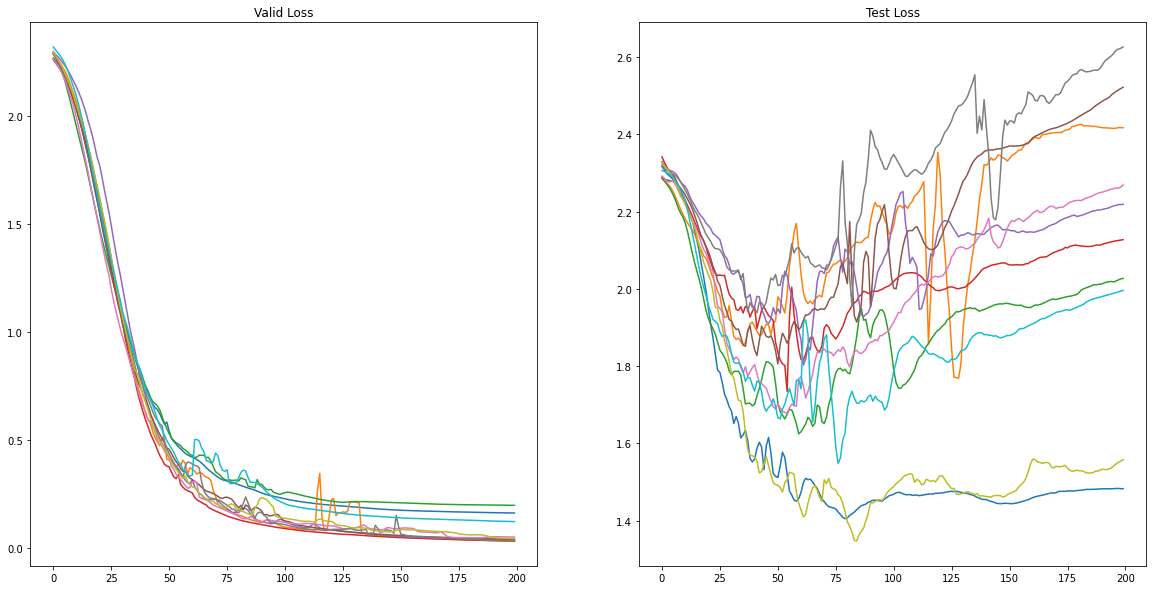

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
for i in range(0,10):
  axs[0].plot(Total_valid_loss[i])
  axs[1].plot(Total_test_loss[i])
axs[0].title.set_text("Valid Loss")
axs[1].title.set_text('Test Loss')

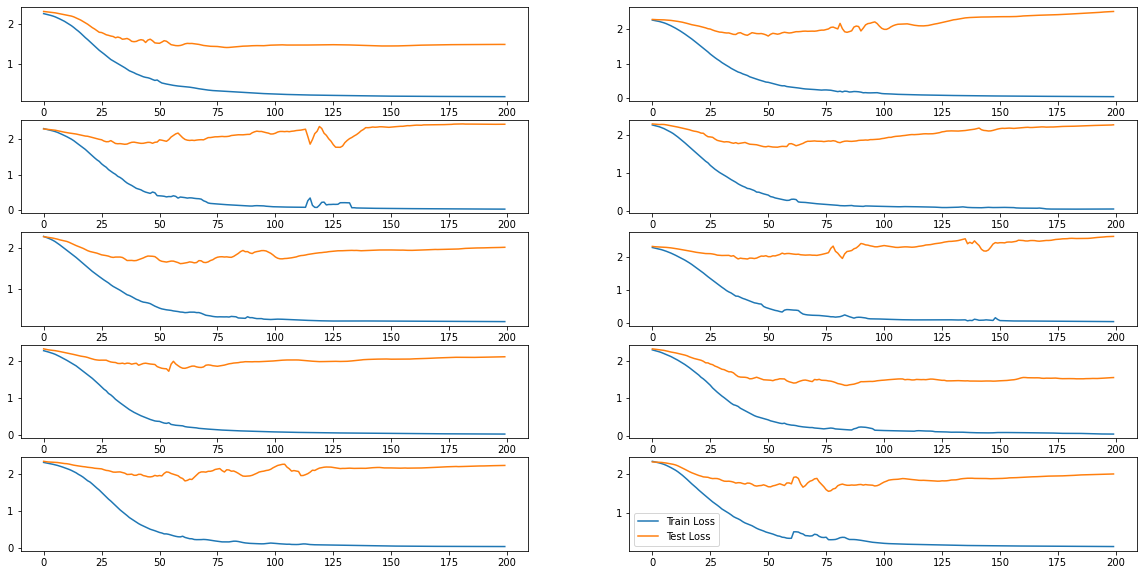

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 10))
for i in range(0,10):
  if i < int(10/2):
    axs[i, 0].plot(Total_valid_loss[i])
    axs[i, 0].plot(Total_test_loss[i])
  else:
    axs[i-int(10/2), 1].plot(Total_valid_loss[i])
    axs[i-int(10/2), 1].plot(Total_test_loss[i])
plt.legend(['Train Loss','Test Loss'])

In [ ]:
df_loss_accuracy_crossval

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy,Test Accuracy Equal Weight
0,0.019567,1.0,0.162245,0.969697,1.482754,0.57251906,0.523551
1,0.016370,1.0,0.032035,1.0,2.417101,0.40648854,0.354650
2,0.017783,1.0,0.197690,0.969697,2.027067,0.4389313,0.375980
3,0.016470,1.0,0.032073,1.0,2.127354,0.41793892,0.441272
4,0.016459,1.0,0.039696,1.0,2.219166,0.44847327,0.368798
5,0.017933,1.0,0.038856,1.0,2.522120,0.38931298,0.361796
6,0.015779,1.0,0.050530,1.0,2.268797,0.34351146,0.382135
7,0.017906,1.0,0.033016,1.0,2.626338,0.27480915,0.309482
8,0.015669,1.0,0.043353,1.0,1.557197,0.490458,0.482867
9,0.158212,0.99658704,0.336367,1.0,1.741234,0.42366412,0.392814


In [ ]:
overall_df_loss_accuracy_crossval

,Train Accuracy,Val Accuracy,Test Accuracy,Test Accuracy Equal Weight
0,1.0,1.0,0.5648855,0.519313
1,1.0,1.0,0.47709924,0.478254
2,0.99657536,1.0,0.5057252,0.505130
3,1.0,1.0,0.4370229,0.414625
4,1.0,1.0,0.4370229,0.373990
5,1.0,1.0,0.490458,0.479856
6,1.0,0.96875,0.5305343,0.537360
7,1.0,1.0,0.48091602,0.378797
8,1.0,0.96875,0.5648855,0.495058
9,1.0,0.96875,0.40648854,0.446131


In [ ]:
overall_df_loss_accuracy_crossval.mean(axis=0)

Train Accuracy    0.999425
Val Accuracy      0.992308
Test Accuracy     0.690226
dtype: float64

In [ ]:
current_random_number = 9999

In [ ]:
encoded_targets = encoded_targets.sample(frac=1, random_state=3481).reset_index(drop=True)

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,7,ixea,ixea_0031,Nest7
1,9,zegf,zegf_0012,Nest9
2,4,gthh,gthh_0033,Nest4
3,9,zegf,zegf_0018,Nest9
4,1,cgby,cgby_0011,Nest11
...,...,...,...,...
320,6,isab,isab_0020,Nest6
321,1,cgby,cgby_0028,Nest11
322,5,ttog,ttog_0028,Nest5
323,0,sjew,sjew_0019,Nest10


## Train on whole dataset and test, no cross validation

In [ ]:
current_random_number = 621

In [ ]:
def Confusion_matrix_Nest_Pupil(model, test_ds, encoded_targets_test):
  actual_label = []
  predicted_label = []
  predicted_label_name = []

  for x, y, l in test_ds:
    x = x.float()
    x.resize_((1,x.shape[0],x.shape[1]))
    y = torch.tensor(y).long().resize_((1))
    y_hat = model(x)
    pred = torch.max(y_hat, 1)[1]
    actual_label.extend(y.numpy())
    predicted_label.extend(pred.numpy())
    # print(y.numpy(), pred.numpy())
    predicted_label_name.extend(le.inverse_transform(pred.numpy()).tolist())

  encoded_targets_test["Nest Pred"] = predicted_label_name

  PupilID_Nest = np.zeros(shape=(len(encoded_targets_test['indvi'].unique()), len(encoded_targets_test['Nest'].unique())), dtype=int )

  counter = 0;
  PupilID_Nest_Names = []
  for indvi in encoded_targets_test['indvi'].unique():
    current_Bird = encoded_targets_test.loc[encoded_targets_test['indvi']==indvi]
    PupilID_Nest_Names.extend([str(indvi)+'_'+str(current_Bird['Nest'].values[-1])])
    # print(counter, [str(indvi)+'_'+str(current_Bird['Nest'].values[-1])], len(current_Bird['key']))
    for key in current_Bird['key'].unique():
      # print(key, counter, int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values)) , PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))])
      PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))] += 1
    counter += 1

  PupilID_Nest_df = pd.DataFrame(PupilID_Nest, index=PupilID_Nest_Names, columns=[class_label+'_Pred' for class_label in list(le.classes_)])

  return PupilID_Nest_df

In [ ]:
# Final Architecture and training on whole dataset. No cross fold validation
# random_number_set_single = [2021];

# Set numpy seed and torch seed for reproducibility. Make sure this seed is different from that used in data shuffling
# Reset model over different trials to prevent label leakage

# del model
epochs = 150; lr = 0.0005;
repeat_train = 1;

df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Loss', 'Test Accuracy'])
overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Test Accuracy', 'Test Accuracy Equal Weight'])
Total_valid_loss = []
Total_test_loss = []

def validation_metrics (model, valid_dl, class_weights):
  model.eval()
  test_correct = 0
  test_total = 0
  test_sum_loss = 0.0
  test_sum_rmse = 0.0
  actual_label = []
  predicted_label = []
  with torch.no_grad():
    for x, y, l in valid_dl:
        x = x.float()
        x.resize_((1,x.shape[0],x.shape[1]))
        # indv_class_weight = class_weights[y]
        indv_class_weight = 1
        y = torch.tensor(y).long().resize_((1))
        # y_hat = model(x, l)
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)*indv_class_weight
        # loss = criterion(y_pred, y)
        pred = torch.max(y_hat, 1)[1]
        # print(y, pred)
        test_correct += (pred == y).float().sum()
        test_total += y.shape[0]
        test_sum_loss += loss.item()*indv_class_weight*y.shape[0]
        test_sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
        actual_label.extend(y.numpy())
        predicted_label.extend(pred.numpy())
  conf_mat = confusion_matrix(actual_label, predicted_label)
  Equal_Weight_Nest_Acc = Nest_Equal_weight_accuracy(conf_mat)
  # print(conf_mat)
  return test_sum_loss/test_total, test_correct/test_total, test_sum_rmse/test_total, conf_mat, Equal_Weight_Nest_Acc

def Nest_Equal_weight_accuracy(confusion_matrix):
  Nest_sum = confusion_matrix.sum(axis=1)
  Indv_Nest_Acc = [];
  for i in range(0, Nest_sum.shape[0]):
    Indv_Nest_Acc.append(confusion_matrix[i, i]/Nest_sum[i])
    # print(confusion_matrix[i, i]/Nest_sum[i])
  return np.mean(Indv_Nest_Acc)

def trainset_shuffle(input_dataset):
  encoded_targets, le = data_splitting_based_on_sample_size(input_dataset)        ###  CHANGE HERE FOR TUTOR OR PUPIL DATASET TRAINING
  encoded_targets = encoded_targets.sample(frac=1, random_state=int(np.random.randint(9999, size=1))).reset_index(drop=True)

  X_total = []; y_total = [];

  for key in encoded_targets['key'].unique():
    data, label = create_sequence_feature(input_dataset, key, le, label_select='Nest')
    X_total.append(data)
    y_total.append(label)

  total_ds = ReviewsDataset(X_total, y_total)

  return total_ds, encoded_targets

train_ds = trainset_shuffle(Pupil_dataset)   ###  CHANGE HERE FOR TUTOR OR PUPIL DATASET TRAINING

for val in range(repeat_train):

  model =  LSTM_fixed_len(1024, 64, len(le.classes_), 1)   ### SET MODEL ARCHITECTURE HERE
  
  print(model.eval())
  class_weights_tensor = torch.tensor(class_weights, dtype=float)
  # criterion = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.float())
  # criterion = torch.nn.CrossEntropyLoss()
  parameters = filter(lambda p: p.requires_grad, model.parameters())
  optimizer = torch.optim.Adam(parameters, lr=lr)
  # model.train()

  epoch_best_loss = 0
  epoch_best_acc = 0
  epoch_best_val_loss = 0
  epoch_best_val_acc = 0
  overall_best_model_train_acc = 0
  best_model_test_acc = 0
  best_model_test_acc_equal_weight = 0

  overall_best_model_stats = []
  valid_loss_iter = []
  test_loss_iter = []

  for i in range(epochs):
    model.train()
    epoch_loss = 0
    loss = 0
    epoch_acc = 0    
    train_correct = 0
    train_total = 0
    optimizer.zero_grad()

    train_ds, _unused = trainset_shuffle(Pupil_dataset)   ###  CHANGE HERE FOR TUTOR OR PUPIL DATASET TRAINING

    for iter, (x, y, l) in enumerate(train_ds):
        x = x.float()
        x.resize_((1,x.shape[0],x.shape[1]))
        # indv_class_weight = class_weights[y]
        indv_class_weight = 1
        y = torch.tensor(y).long().resize_((1))
        # y_pred = model(x, l)
        y_pred = model(x)
        # optimizer.zero_grad()
        # loss += criterion(y_pred, y)
        loss += F.cross_entropy(y_pred, y)*indv_class_weight
        # print(loss, indv_class_weight, loss*indv_class_weight)
        # loss.backward()
        # optimizer.step()
        # epoch_loss += loss*y.shape[0]
        train_total += y.shape[0]
        pred_train = torch.max(y_pred, 1)[1]
        train_correct += (pred_train == y).float().sum()
    loss.backward()
    optimizer.step()          
    epoch_loss =  loss.item()*y.shape[0]      
    epoch_loss /= (iter + 1)
    epoch_acc = train_correct/train_total

    val_epoch_loss, val_accuracy, val_rmse, val_conf_mat, val_acuracy_equal_weight = validation_metrics(model, train_ds, class_weights)
    valid_loss_iter.append(val_epoch_loss)

    test_epoch_loss, test_accuracy, test_rmse, test_conf_mat, test_accuracy_equal_weight = validation_metrics(model, test_ds, class_weights)
    test_loss_iter.append(test_epoch_loss)
    
    print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, test loss %.3f, test accuracy %.3f, EW Test Accuracy %.3f" % (i, epoch_loss, epoch_acc, val_epoch_loss, val_accuracy, test_epoch_loss, test_accuracy, test_accuracy_equal_weight))

    if epoch_best_acc <= epoch_acc:
      if epoch_best_val_acc <= val_accuracy:
        epoch_best_val_loss = val_epoch_loss
        epoch_best_loss = epoch_loss
        epoch_best_acc = epoch_acc
        epoch_best_val_acc = val_accuracy
        epoch_best_val_acc_equal_weight = val_acuracy_equal_weight
        test_accuracy_temp = test_accuracy
        test_accuracy_temp_equal_weight = test_accuracy_equal_weight
        test_epoch_loss_temp = test_epoch_loss
        now = datetime.now() 
        dt_string = now.strftime("%d_%m_%Y_%H_%M")
        best_model = model
        print('Saving overall best train val model')        
        # if best_model_test_acc <= test_accuracy:
        if best_model_test_acc_equal_weight <= test_accuracy_equal_weight:
          best_model_test_acc = test_accuracy
          best_model_test_acc_equal_weight = test_accuracy_equal_weight
          best_model_test_loss = test_epoch_loss
          best_model_conf_mat = test_conf_mat
          overall_best_model = model
          overall_best_model_train_acc = epoch_acc
          overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy(), best_model_test_acc_equal_weight]
          overall_best_test_conf_matrix = pd.DataFrame(best_model_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          overall_best_valid_conf_matrix = pd.DataFrame(val_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          print('Saving overall best test model')
        elif overall_best_model_train_acc < epoch_acc:
          best_model_test_acc = test_accuracy
          best_model_test_acc_equal_weight = test_accuracy_equal_weight
          best_model_test_loss = test_epoch_loss
          best_model_conf_mat = test_conf_mat
          overall_best_model = model
          overall_best_model_train_acc = epoch_acc
          overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy(), best_model_test_acc_equal_weight]
          overall_best_test_conf_matrix = pd.DataFrame(best_model_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          overall_best_valid_conf_matrix = pd.DataFrame(val_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          print('Replacing overall best test model')

  Total_valid_loss.append(valid_loss_iter)
  Total_test_loss.append(test_loss_iter)

  df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.numpy(),  'Val Loss':  epoch_best_val_loss, 
                                            'Val Accuracy': epoch_best_val_acc.numpy(), 'Test Loss': test_epoch_loss_temp, 'Test Accuracy': test_accuracy_temp.numpy(), 
                                            'Test Accuracy Equal Weight': test_accuracy_temp_equal_weight}, ignore_index=True)

  overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)

  overall_best_test_conf_matrix.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Reverse/'+'Best_Conf_Mat_Test_Random_'+str(current_random_number)+'_Iter_'+str(val)+'.csv')
  # overall_best_valid_conf_matrix.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/'+'Conf_Mat_Train_Random_'+str(current_random_number)+'.csv')
  # overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/'+'Accuracy_Table_Test_Random_'+str(current_random_number)+'.csv')

  # torch.save(best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/'+'Total'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
  #                                                                                     '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(test_accuracy_temp.numpy(),4)))

  # torch.save(overall_best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/'+'Total'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
  #                                                                                     '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(best_model_test_acc.numpy(),4)))
  torch.save(overall_best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Reverse/'+'Total'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
                                                                                      '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(best_model_test_acc.numpy(),4))+
                                                                                      '_EW_Test_'+str(np.round(best_model_test_acc_equal_weight,4))+'_Iter_'+str(val))
  PupilID_Nest_df = Confusion_matrix_Nest_Pupil(overall_best_model, test_ds, encoded_targets_test)
  PupilID_Nest_df.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Reverse/'+'Best_Conf_Mat_Test_Pupil_Random_'+str(current_random_number)+'_Iter_'+str(val)+'.csv')
overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Reverse/'+'Overall_Results_'+str(current_random_number)+'_Iter_'+str(val)+'.csv')

LSTM_fixed_len(
  (lstm): LSTM(1024, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 0, train loss 2.289, train accuracy 0.116, val loss 2.215, val accuracy 0.181, test loss 2.315, test accuracy 0.135, EW Test Accuracy 0.178
Saving overall best train val model
Saving overall best test model
Epoch 1, train loss 2.215, train accuracy 0.181, val loss 2.156, val accuracy 0.298, test loss 2.301, test accuracy 0.117, EW Test Accuracy 0.172
Saving overall best train val model
Replacing overall best test model
Epoch 2, train loss 2.156, train accuracy 0.298, val loss 2.104, val accuracy 0.387, test loss 2.291, test accuracy 0.111, EW Test Accuracy 0.167
Saving overall best train val model
Replacing overall best test model
Epoch 3, train loss 2.104, train accuracy 0.387, val loss 2.056, val accuracy 0.418, test loss 2.282, test accuracy 0.105, EW Test Accuracy 0.160
Saving overall best train val model
Replacing overall best test model
Epoch 4, train 

In [ ]:
df_loss_accuracy_crossval

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy,Test Accuracy Equal Weight
0,0.051311,0.9980916,0.050591,0.9980916,1.033007,0.6615385,0.640276


In [ ]:
overall_df_loss_accuracy_crossval

,Train Accuracy,Val Accuracy,Test Accuracy,Test Accuracy Equal Weight
0,0.9980916,0.9980916,0.68,0.658392


In [ ]:
import matplotlib.pyplot as plt

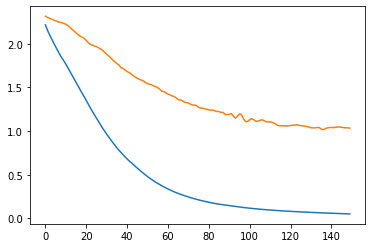

In [ ]:
plt.plot(Total_valid_loss[0])
plt.plot(Total_test_loss[0])

In [ ]:
lr

0.0005

In [ ]:
test_epoch_loss, test_accuracy, test_rmse, test_conf_mat, test_accuracy_equal_weight = validation_metrics(model, test_ds, class_weights)

In [ ]:
conf_mat = pd.read_csv(base_path+'SavedModels/FullDataset/LSTM/Unidirectional/Repeat_Exp/'+'Best_Conf_Mat_Test_Random_9998_Iter_1.csv')

In [ ]:
conf_mat = conf_mat.drop(['Unnamed: 0'], axis=1)

In [ ]:
conf_mat

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
0,4,0,0,0,0,1,0,0,0,2
1,0,45,0,0,0,0,0,0,0,16
2,0,4,25,14,0,4,21,0,1,17
3,0,2,5,71,0,0,3,0,0,3
4,0,29,0,0,0,0,0,0,0,3
5,0,0,0,0,0,26,10,0,3,0
6,0,6,0,1,56,0,39,1,0,4
7,0,7,0,1,6,0,2,18,3,20
8,0,0,0,0,0,0,0,0,28,2
9,0,0,2,3,0,0,0,0,0,16


In [ ]:
Nest_Equal_weight_accuracy(conf_mat.values)

0.5487249476015441

### Load Model test on randomized pupil sequence

In [ ]:
model_name = "Total18_08_2021_21_29_Train_1.0_Val_1.0_Test_0.3531_EW_Test_0.3724_Iter_0"
model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Unidirectional/Repeat_Exp/'+model_name)
model.eval()

LSTM_fixed_len(
  (lstm): LSTM(1024, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
model_name = "Total13_09_2021_23_26_Train_1.0_Val_1.0_Test_0.4943_EW_Test_0.4821_Iter_5"
model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Bidirectional/Repeat_Exp/64 1/'+model_name)
model.eval()

LSTM_fixed_len_bidir(
  (lstm): LSTM(1024, 64, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
model_name = "Total25_09_2021_17_11_Train_0.9981_Val_0.9981_Test_0.68_EW_Test_0.6584_Iter_0"
model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Unidirectional/Reverse/'+model_name)
model.eval()

LSTM_fixed_len(
  (lstm): LSTM(1024, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
Pupil_df = Confusion_matrix_Nest_Pupil(model, test_ds, encoded_targets_test)

In [ ]:
Pupil_df

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
nzen_Nest2,0,0,12,5,0,0,0,0,0,0
xsup_Nest3,0,0,7,32,0,0,0,0,0,0
gthh_Nest4,2,0,1,16,9,1,0,4,0,0
ttog_Nest5,12,0,0,6,8,10,0,1,0,0
isab_Nest6,0,1,4,0,0,0,23,0,0,0
ixea_Nest7,0,0,0,0,0,0,0,35,0,0
ihza_Nest8,0,1,0,0,0,0,0,0,26,2
zegf_Nest9,0,0,9,0,1,0,5,1,0,16
sjew_Nest10,3,0,0,23,0,0,0,0,0,0
cgby_Nest11,0,49,0,0,0,0,0,0,0,0


In [ ]:
int(np.random.randint(1,high=9999, size=1))

4772

In [ ]:
random_number_set = []
for i in range(0,100):
  random_number_set.append(int(np.random.randint(1,high=9999, size=1)))

In [ ]:
random_number_set

[9809,
 9553,
 5153,
 3572,
 2999,
 7136,
 3360,
 9944,
 271,
 7697,
 5398,
 8613,
 7194,
 8117,
 2421,
 8793,
 8210,
 1108,
 3390,
 2703,
 5760,
 8738,
 837,
 6582,
 9714,
 5799,
 510,
 9670,
 9305,
 7458,
 7612,
 2604,
 4524,
 8021,
 898,
 8786,
 5072,
 2642,
 1688,
 7489,
 3680,
 1588,
 1164,
 9282,
 6290,
 9632,
 6362,
 1037,
 5489,
 795,
 9426,
 8246,
 6785,
 8786,
 8034,
 5920,
 6325,
 3356,
 7989,
 3995,
 5678,
 6471,
 6295,
 1460,
 687,
 2745,
 1332,
 660,
 1988,
 2902,
 264,
 9735,
 1684,
 8853,
 5591,
 8497,
 7440,
 3810,
 6917,
 1706,
 1116,
 3965,
 1790,
 4860,
 6070,
 6739,
 3436,
 5083,
 4828,
 2793,
 2618,
 5088,
 437,
 216,
 3823,
 4561,
 1233,
 7908,
 2907,
 9908]

In [ ]:
# model_name = "Total13_09_2021_23_26_Train_1.0_Val_1.0_Test_0.4943_EW_Test_0.4821_Iter_5"
# model_name = "Total16_09_2021_19_08_Train_1.0_Val_1.0_Test_0.5172_EW_Test_0.4626_Iter_9"
# model_name = "Total16_09_2021_18_41_Train_1.0_Val_1.0_Test_0.6355_EW_Test_0.5827_Iter_8"
# model_name = "Total14_09_2021_00_04_Train_1.0_Val_1.0_Test_0.376_EW_Test_0.4026_Iter_6"
# loaded_model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Bidirectional/Repeat_Exp/64 1/'+model_name)
# loaded_model.eval()

# model_name = "Total21_08_2021_18_27_Train_1.0_Val_1.0_Test_0.5153_EW_Test_0.4462_Iter_2"
# loaded_model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Unidirectional/Repeat_Exp/'+model_name)
# loaded_model.eval()

model_name = "Total25_09_2021_17_11_Train_0.9981_Val_0.9981_Test_0.68_EW_Test_0.6584_Iter_0"
loaded_model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Unidirectional/Reverse/'+model_name)
loaded_model.eval()

def Confusion_matrix_Nest_Pupil(model, test_ds, encoded_targets_test):
  actual_label = []
  predicted_label = []
  predicted_label_name = []

  for x, y, l in test_ds:
      x = x.float()
      x.resize_((1,x.shape[0],x.shape[1]))
      y = torch.tensor(y).long().resize_((1))
      y_hat = model(x)
      pred = torch.max(y_hat, 1)[1]
      actual_label.extend(y.numpy())
      predicted_label.extend(pred.numpy())
      # print(y.numpy(), pred.numpy())
      predicted_label_name.extend(le.inverse_transform(pred.numpy()).tolist())
  conf_mat = confusion_matrix(actual_label, predicted_label)
  # print(conf_mat)
  encoded_targets_test["Nest Pred"] = predicted_label_name

  PupilID_Nest = np.zeros(shape=(len(encoded_targets_test['indvi'].unique()), len(encoded_targets_test['Nest'].unique())), dtype=int)

  counter = 0;
  PupilID_Nest_Names = []
  for indvi in encoded_targets_test['indvi'].unique():
    current_Bird = encoded_targets_test.loc[encoded_targets_test['indvi']==indvi]
    PupilID_Nest_Names.extend([str(indvi)+'_'+str(current_Bird['Nest'].values[-1])])
    # print(counter, [str(indvi)+'_'+str(current_Bird['Nest'].values[-1])], len(current_Bird['key']))
    for key in current_Bird['key'].unique():
      # print(key, counter, int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values)) , PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))])
      PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))] += 1
    counter += 1
 
  Pupil_Nest_Sum = np.sum(PupilID_Nest, axis=1)
  # print(Pupil_Nest_Sum)

  Pupil_Nest_Acc = [];
  # Pupil_Nest_Acc.append(PupilID_Nest[0,2]/Pupil_Nest_Sum[0])
  # Pupil_Nest_Acc.append(PupilID_Nest[1,2]/Pupil_Nest_Sum[1])
  # Pupil_Nest_Acc.append(PupilID_Nest[2,2]/Pupil_Nest_Sum[2])
  # Pupil_Nest_Acc.append(PupilID_Nest[3,3]/Pupil_Nest_Sum[3])
  # Pupil_Nest_Acc.append(PupilID_Nest[4,3]/Pupil_Nest_Sum[4])
  # Pupil_Nest_Acc.append(PupilID_Nest[5,4]/Pupil_Nest_Sum[5])
  # Pupil_Nest_Acc.append(PupilID_Nest[6,5]/Pupil_Nest_Sum[6])
  # Pupil_Nest_Acc.append(PupilID_Nest[7,6]/Pupil_Nest_Sum[7])
  # Pupil_Nest_Acc.append(PupilID_Nest[8,6]/Pupil_Nest_Sum[8])
  # Pupil_Nest_Acc.append(PupilID_Nest[9,7]/Pupil_Nest_Sum[9])
  # Pupil_Nest_Acc.append(PupilID_Nest[10,7]/Pupil_Nest_Sum[10])
  # Pupil_Nest_Acc.append(PupilID_Nest[11,8]/Pupil_Nest_Sum[11])
  # Pupil_Nest_Acc.append(PupilID_Nest[12,9]/Pupil_Nest_Sum[12])
  # Pupil_Nest_Acc.append(PupilID_Nest[13,0]/Pupil_Nest_Sum[13])
  # Pupil_Nest_Acc.append(PupilID_Nest[14,1]/Pupil_Nest_Sum[14])
  # Pupil_Nest_Acc.append(PupilID_Nest[15,1]/Pupil_Nest_Sum[15])

  PupilID_Nest_df = pd.DataFrame(PupilID_Nest, index=PupilID_Nest_Names, columns=[class_label+'_Pred' for class_label in list(le.classes_)])
  # print(PupilID_Nest_df)
  # print(np.mean(Pupil_Nest_Acc))
  return PupilID_Nest_df, np.mean(Pupil_Nest_Acc)

def validation_metrics (model, valid_dl, class_weights):
  model.eval()
  test_correct = 0
  test_total = 0
  test_sum_loss = 0.0
  test_sum_rmse = 0.0
  actual_label = []
  predicted_label = []
  with torch.no_grad():
    for x, y, l in valid_dl:
        x = x.float()
        x.resize_((1,x.shape[0],x.shape[1]))
        # indv_class_weight = class_weights[y]
        indv_class_weight = 1
        y = torch.tensor(y).long().resize_((1))
        # y_hat = model(x, l)
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)*indv_class_weight
        # loss = criterion(y_pred, y)
        pred = torch.max(y_hat, 1)[1]
        # print(y, pred)
        test_correct += (pred == y).float().sum()
        test_total += y.shape[0]
        test_sum_loss += loss.item()*indv_class_weight*y.shape[0]
        test_sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
        actual_label.extend(y.numpy())
        predicted_label.extend(pred.numpy())
  conf_mat = confusion_matrix(actual_label, predicted_label)
  Equal_Weight_Nest_Acc = Nest_Equal_weight_accuracy(conf_mat)
  # print(conf_mat)
  return test_sum_loss/test_total, test_correct/test_total, test_sum_rmse/test_total, conf_mat, Equal_Weight_Nest_Acc

def Nest_Equal_weight_accuracy(confusion_matrix):
  Nest_sum = confusion_matrix.sum(axis=1)
  Indv_Nest_Acc = [];  
  for i in range(0, Nest_sum.shape[0]):
    Indv_Nest_Acc.append(confusion_matrix[i, i]/Nest_sum[i])
    # print(confusion_matrix[i, i]/Nest_sum[i])
  return np.mean(Indv_Nest_Acc)

def create_sequence_feature_randomize(syllable_df_Nest_Total, given_key, encoder, label_select='indv', random_state=2021):
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]
    current_songfile = current_songfile.sample(frac=1, random_state=random_state).reset_index(drop=True)
    sequence_length = current_songfile['indvi'].values[-1]
    temp_list = current_songfile['densenet121_features'].to_list()
    label = encoder.transform(current_songfile[label_select].values)[-1]
    # for k in range(sequence_length,max_sequence_length):
    #   temp_list.append(np.zeros(len(temp_list[0])))
    return [temp_list, sequence_length], label

test_epoch_loss, test_accuracy, test_rmse, test_conf_mat, test_accuracy_equal_weight = validation_metrics(loaded_model, test_ds, class_weights)

print("Normal Data Set Test Accuracy %.3f, EW Test Accuracy %.3f" % (test_accuracy, test_accuracy_equal_weight))

test_stats_scramble = pd.DataFrame(columns=['Random Number', 'Train Accuracy', 'Nest Accuracy'])

for current_random_number in random_number_set[:50]:
  print(current_random_number)

  X_test = []; y_test = [];
  
  print('Scrambling test sequence')
  for key in encoded_targets_test['key'].unique():# [:10]:
      data, label = create_sequence_feature_randomize(Tutor_dataset, key, le, label_select='Nest', random_state=current_random_number)   # CHANGE HERE WHEN SWITCHING FROM PUPIL TO TUTOR FOR TEST SET
      X_test.append(data)
      y_test.append(label)

  test_ds_shuffle = ReviewsDataset(X_test, y_test)

  test_epoch_loss, test_accuracy, test_rmse, test_conf_mat, test_accuracy_equal_weight = validation_metrics(loaded_model, test_ds_shuffle, class_weights)

  PupilID_Nest_df, Pupil_Nest_Acc = Confusion_matrix_Nest_Pupil(loaded_model, test_ds_shuffle, encoded_targets_test)
  PupilID_Nest_df.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Randomize_Repeat/'+'Best_Conf_Mat_Test_Pupil_Random_'+str(current_random_number)+'.csv')

  test_stats_scramble = test_stats_scramble.append({'Random Number': int(current_random_number), 
						                                    'Train Accuracy': float(test_accuracy.numpy()),   
                                                'Nest Accuracy': test_accuracy_equal_weight,
                                                'Pupil Accuracy': Pupil_Nest_Acc}, ignore_index=True)

  print("Random Number %d, Test accuracy %.3f, EW Test Accuracy %.3f, Pupil Accuracy %.3f" % (current_random_number, test_accuracy, test_accuracy_equal_weight, Pupil_Nest_Acc)) 
  del test_ds_shuffle

Normal Data Set Test Accuracy 0.662, EW Test Accuracy 0.640
3859
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 3859, Test accuracy 0.594, EW Test Accuracy 0.578, Pupil Accuracy nan
7857
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 7857, Test accuracy 0.606, EW Test Accuracy 0.591, Pupil Accuracy nan
7980
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 7980, Test accuracy 0.628, EW Test Accuracy 0.608, Pupil Accuracy nan
2999
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 2999, Test accuracy 0.606, EW Test Accuracy 0.582, Pupil Accuracy nan
3324
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 3324, Test accuracy 0.597, EW Test Accuracy 0.583, Pupil Accuracy nan
1778
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 1778, Test accuracy 0.591, EW Test Accuracy 0.572, Pupil Accuracy nan
329
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 329, Test accuracy 0.560, EW Test Accuracy 0.552, Pupil Accuracy nan
5689
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5689, Test accuracy 0.600, EW Test Accuracy 0.592, Pupil Accuracy nan
2746
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 2746, Test accuracy 0.646, EW Test Accuracy 0.628, Pupil Accuracy nan
8964
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 8964, Test accuracy 0.557, EW Test Accuracy 0.537, Pupil Accuracy nan
70
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 70, Test accuracy 0.575, EW Test Accuracy 0.559, Pupil Accuracy nan
4786
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4786, Test accuracy 0.603, EW Test Accuracy 0.577, Pupil Accuracy nan
2816
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 2816, Test accuracy 0.594, EW Test Accuracy 0.577, Pupil Accuracy nan
2405
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 2405, Test accuracy 0.603, EW Test Accuracy 0.587, Pupil Accuracy nan
2681
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 2681, Test accuracy 0.637, EW Test Accuracy 0.621, Pupil Accuracy nan
5769
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5769, Test accuracy 0.578, EW Test Accuracy 0.559, Pupil Accuracy nan
9327
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 9327, Test accuracy 0.640, EW Test Accuracy 0.624, Pupil Accuracy nan
7867
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 7867, Test accuracy 0.551, EW Test Accuracy 0.532, Pupil Accuracy nan
4469
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4469, Test accuracy 0.637, EW Test Accuracy 0.620, Pupil Accuracy nan
4928
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4928, Test accuracy 0.609, EW Test Accuracy 0.593, Pupil Accuracy nan
5730
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5730, Test accuracy 0.622, EW Test Accuracy 0.599, Pupil Accuracy nan
858
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 858, Test accuracy 0.588, EW Test Accuracy 0.575, Pupil Accuracy nan
6775
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 6775, Test accuracy 0.560, EW Test Accuracy 0.547, Pupil Accuracy nan
5487
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5487, Test accuracy 0.631, EW Test Accuracy 0.612, Pupil Accuracy nan
1464
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 1464, Test accuracy 0.665, EW Test Accuracy 0.651, Pupil Accuracy nan
7365
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 7365, Test accuracy 0.582, EW Test Accuracy 0.564, Pupil Accuracy nan
4313
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4313, Test accuracy 0.538, EW Test Accuracy 0.519, Pupil Accuracy nan
9324
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 9324, Test accuracy 0.588, EW Test Accuracy 0.573, Pupil Accuracy nan
8958
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 8958, Test accuracy 0.612, EW Test Accuracy 0.597, Pupil Accuracy nan
7663
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 7663, Test accuracy 0.606, EW Test Accuracy 0.585, Pupil Accuracy nan
5362
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5362, Test accuracy 0.618, EW Test Accuracy 0.599, Pupil Accuracy nan
299
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 299, Test accuracy 0.628, EW Test Accuracy 0.605, Pupil Accuracy nan
4931
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4931, Test accuracy 0.560, EW Test Accuracy 0.545, Pupil Accuracy nan
4906
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4906, Test accuracy 0.625, EW Test Accuracy 0.605, Pupil Accuracy nan
5007
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5007, Test accuracy 0.615, EW Test Accuracy 0.592, Pupil Accuracy nan
5848
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5848, Test accuracy 0.606, EW Test Accuracy 0.593, Pupil Accuracy nan
5119
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5119, Test accuracy 0.600, EW Test Accuracy 0.584, Pupil Accuracy nan
7172
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 7172, Test accuracy 0.594, EW Test Accuracy 0.578, Pupil Accuracy nan
6862
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 6862, Test accuracy 0.560, EW Test Accuracy 0.544, Pupil Accuracy nan
3981
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 3981, Test accuracy 0.622, EW Test Accuracy 0.605, Pupil Accuracy nan
8262
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 8262, Test accuracy 0.591, EW Test Accuracy 0.582, Pupil Accuracy nan
5441
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5441, Test accuracy 0.594, EW Test Accuracy 0.571, Pupil Accuracy nan
4702
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4702, Test accuracy 0.622, EW Test Accuracy 0.608, Pupil Accuracy nan
4177
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 4177, Test accuracy 0.609, EW Test Accuracy 0.598, Pupil Accuracy nan
2611
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 2611, Test accuracy 0.575, EW Test Accuracy 0.553, Pupil Accuracy nan
6342
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 6342, Test accuracy 0.569, EW Test Accuracy 0.551, Pupil Accuracy nan
9402
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 9402, Test accuracy 0.585, EW Test Accuracy 0.567, Pupil Accuracy nan
5609
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 5609, Test accuracy 0.563, EW Test Accuracy 0.547, Pupil Accuracy nan
3590
Scrambling test sequence


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Random Number 3590, Test accuracy 0.615, EW Test Accuracy 0.609, Pupil Accuracy nan
5397
Scrambling test sequence
Random Number 5397, Test accuracy 0.612, EW Test Accuracy 0.591, Pupil Accuracy nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
test_stats_scramble

,Random Number,Train Accuracy,Nest Accuracy,Pupil Accuracy
0,3859.0,0.593846,0.578103,NaN
1,7857.0,0.606154,0.590928,NaN
2,7980.0,0.627692,0.608203,NaN
3,2999.0,0.606154,0.582082,NaN
4,3324.0,0.596923,0.583178,NaN
5,1778.0,0.590769,0.571989,NaN
6,329.0,0.560000,0.551622,NaN
7,5689.0,0.600000,0.591729,NaN
8,2746.0,0.646154,0.628010,NaN
9,8964.0,0.556923,0.536715,NaN


In [ ]:
PupilID_Nest_df, Pupil_Nest_Acc = Confusion_matrix_Nest_Pupil(loaded_model, test_ds, encoded_targets_test)

             Nest10_Pred  Nest11_Pred  ...  Nest8_Pred  Nest9_Pred
cxyc_Nest2             0            0  ...           0           1
nsrn_Nest2             0            0  ...           0          13
qfod_Nest2             0            0  ...           0           7
khxv_Nest3             1            1  ...           0           0
oogw_Nest3             0            0  ...           0           0
kcos_Nest4             0           30  ...           0           2
tbfk_Nest5             0            3  ...           0           0
bbyj_Nest6             0            2  ...           0          15
kccr_Nest6             0            9  ...           0           0
onsu_Nest7             0            0  ...           0          24
vusu_Nest7             0            1  ...           1           2
kfgj_Nest8             0            0  ...          15           0
inji_Nest9             0            0  ...           0          15
hsew_Nest10            0            0  ...           0        

In [ ]:
PupilID_Nest_df

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
cxyc_Nest2,0,0,22,0,0,1,3,0,0,1
nsrn_Nest2,0,0,14,5,0,0,6,0,0,13
qfod_Nest2,0,0,3,7,0,0,4,0,0,7
khxv_Nest3,1,1,20,20,1,0,5,0,0,0
oogw_Nest3,0,0,20,16,0,0,0,0,0,0
kcos_Nest4,0,30,0,0,0,0,0,0,0,2
tbfk_Nest5,0,3,0,0,1,12,23,0,0,0
bbyj_Nest6,0,2,3,0,0,0,24,0,0,15
kccr_Nest6,0,9,0,3,3,0,48,0,0,0
onsu_Nest7,0,0,0,0,0,2,0,2,0,24


In [ ]:
# full_path = base_path+'SavedModels/FullDataset/LSTM/Bidirectional/Repeat_Exp/64 1/'
full_path = base_path+'SavedModels/FullDataset/LSTM/Unidirectional/Randomize'
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames(full_path)
for count, name in enumerate(filenames):
  if 'Best_Conf_Mat_Test_Pupil_Random' in name:
    print(count, name)

0 Best_Conf_Mat_Test_Pupil_Random_3859.csv
1 Best_Conf_Mat_Test_Pupil_Random_7857.csv
2 Best_Conf_Mat_Test_Pupil_Random_7980.csv
3 Best_Conf_Mat_Test_Pupil_Random_2999.csv
4 Best_Conf_Mat_Test_Pupil_Random_3324.csv
5 Best_Conf_Mat_Test_Pupil_Random_1778.csv
6 Best_Conf_Mat_Test_Pupil_Random_329.csv
7 Best_Conf_Mat_Test_Pupil_Random_5689.csv
8 Best_Conf_Mat_Test_Pupil_Random_2746.csv
9 Best_Conf_Mat_Test_Pupil_Random_8964.csv
10 Best_Conf_Mat_Test_Pupil_Random_70.csv
11 Best_Conf_Mat_Test_Pupil_Random_4786.csv
12 Best_Conf_Mat_Test_Pupil_Random_2816.csv
13 Best_Conf_Mat_Test_Pupil_Random_2405.csv
14 Best_Conf_Mat_Test_Pupil_Random_2681.csv
15 Best_Conf_Mat_Test_Pupil_Random_5769.csv
16 Best_Conf_Mat_Test_Pupil_Random_9327.csv
17 Best_Conf_Mat_Test_Pupil_Random_7867.csv
18 Best_Conf_Mat_Test_Pupil_Random_4469.csv
19 Best_Conf_Mat_Test_Pupil_Random_4928.csv
20 Best_Conf_Mat_Test_Pupil_Random_5730.csv
21 Best_Conf_Mat_Test_Pupil_Random_858.csv
22 Best_Conf_Mat_Test_Pupil_Random_6775.csv
23

In [ ]:
instances = 0
del Nest_Pupil_df_sum 
# Nest_Pupil_df_sum = pd.DataFrame({})
# Individual_df_columnsum = [];

for count, name in enumerate(filenames):
  if 'Best_Conf_Mat_Test_Pupil_Random' in name:
    print(count, name)
    # del Nest_Pupil_df_sum
    Nest_Pupil_df = pd.read_csv(full_path+'/'+name)
    Nest_Pupil_df.pop("Unnamed: 0")
    if count == 0: # Change this based on observation
      Nest_Pupil_df_sum = Nest_Pupil_df.values
    else:
      Nest_Pupil_df_sum += Nest_Pupil_df.values
    instances += 1
    # Individual_df_columnsum.append(Nest_Pupil_df.sum(axis=1).values)

# Nest_Pupil_df_avg = Nest_Pupil_df_sum/instances
Nest_Pupil_df_avg = pd.DataFrame(Nest_Pupil_df_sum/instances)

0 Best_Conf_Mat_Test_Pupil_Random_3859.csv
1 Best_Conf_Mat_Test_Pupil_Random_7857.csv
2 Best_Conf_Mat_Test_Pupil_Random_7980.csv
3 Best_Conf_Mat_Test_Pupil_Random_2999.csv
4 Best_Conf_Mat_Test_Pupil_Random_3324.csv
5 Best_Conf_Mat_Test_Pupil_Random_1778.csv
6 Best_Conf_Mat_Test_Pupil_Random_329.csv
7 Best_Conf_Mat_Test_Pupil_Random_5689.csv
8 Best_Conf_Mat_Test_Pupil_Random_2746.csv
9 Best_Conf_Mat_Test_Pupil_Random_8964.csv
10 Best_Conf_Mat_Test_Pupil_Random_70.csv
11 Best_Conf_Mat_Test_Pupil_Random_4786.csv
12 Best_Conf_Mat_Test_Pupil_Random_2816.csv
13 Best_Conf_Mat_Test_Pupil_Random_2405.csv
14 Best_Conf_Mat_Test_Pupil_Random_2681.csv
15 Best_Conf_Mat_Test_Pupil_Random_5769.csv
16 Best_Conf_Mat_Test_Pupil_Random_9327.csv
17 Best_Conf_Mat_Test_Pupil_Random_7867.csv
18 Best_Conf_Mat_Test_Pupil_Random_4469.csv
19 Best_Conf_Mat_Test_Pupil_Random_4928.csv
20 Best_Conf_Mat_Test_Pupil_Random_5730.csv
21 Best_Conf_Mat_Test_Pupil_Random_858.csv
22 Best_Conf_Mat_Test_Pupil_Random_6775.csv
23

In [ ]:
Nest_Pupil_df_avg

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.06,22.76,0.72,0.00,0.66,1.88,0.14,0.38,0.40
1,0.00,0.00,11.28,4.30,0.00,0.00,3.74,0.00,0.02,18.66
2,0.00,0.00,2.42,5.66,0.00,0.00,2.70,0.00,0.00,10.22
3,1.84,1.98,20.18,13.48,0.06,0.00,9.74,0.00,0.00,0.72
4,0.70,0.00,18.24,16.00,0.00,0.00,0.00,1.00,0.00,0.06
5,0.08,26.66,0.00,0.04,0.94,0.38,2.42,0.00,0.00,1.48
6,0.00,7.68,0.00,0.00,0.14,17.40,13.46,0.00,0.26,0.06
7,0.00,2.20,6.62,0.08,0.32,1.56,16.28,0.38,0.00,16.56
8,0.00,17.00,0.00,3.46,0.42,0.28,41.32,0.16,0.26,0.10
9,0.00,0.30,0.42,0.04,4.22,0.58,0.00,1.92,0.00,20.52


### Conf Mat Generation Section

In [ ]:
# model_name = 'Total21_07_2021_19_51_Train_1.0_Val_1.0_Test_0.4122'
# model_name = 'Total11_08_2021_00_15_Train_1.0_Val_1.0_Test_0.5305'
model_name = 'Total11_08_2021_15_34_Train_1.0_Val_1.0_Test_0.6489_EW_Test_0.559'
# model_name = 'Total11_08_2021_17_47_Train_0.9969_Val_0.9969_Test_0.4523_EW_Test_0.5229'
# model_name = 'Total11_08_2021_17_56_Train_1.0_Val_1.0_Test_0.5458_EW_Test_0.4802'
# model_name = 'Total11_08_2021_19_58_Train_1.0_Val_1.0_Test_0.5401_EW_Test_0.5061'
# model_name = 'Total11_08_2021_21_47_Train_1.0_Val_1.0_Test_0.542_EW_Test_0.5223'
model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Unidirectional/'+model_name)
model.eval()

LSTM_fixed_len(
  (lstm): LSTM(1024, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
model_name = 'Total21_07_2021_20_49_Train_1.0_Val_1.0_Test_0.4809'
model = torch.load(base_path+'SavedModels/FullDataset/LSTM/Bidirectional/'+model_name)
model.eval()

LSTM_fixed_len_bidir(
  (lstm): LSTM(1024, 512, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
actual_label = []
predicted_label = []
predicted_label_name = []

for x, y, l in test_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  # indv_class_weight = class_weights[y]
  y = torch.tensor(y).long().resize_((1))
  # y_hat = model(x, l)
  y_hat = model(x)
  pred = torch.max(y_hat, 1)[1]
  # print(y, pred)
  actual_label.extend(y.numpy())
  predicted_label.extend(pred.numpy())
  print(y.numpy(), pred.numpy())
  predicted_label_name.extend(le.inverse_transform(pred.numpy()).tolist())
conf_mat = confusion_matrix(actual_label, predicted_label)

[2] [2]
[2] [2]
[2] [6]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [8]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [6]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [3]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [9]
[2] [2]
[2] [2]
[2] [6]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [3]
[2] [6]
[2] [6]
[2] [2]
[2] [2]
[2] [2]
[2] [6]
[2] [6]
[2] [2]
[2] [3]
[2] [3]
[2] [3]
[2] [6]
[2] [6]
[2] [2]
[2] [3]
[2] [3]
[2] [6]
[2] [6]
[2] [3]
[2] [3]
[2] [3]
[2] [6]
[2] [6]
[2] [3]
[2] [3]
[2] [3]
[2] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [3]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [3]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [2]
[3] [3]
[3] [3]
[3] [3]
[3] [6]
[3] [6]
[3] [2]
[3] [3]
[3] [2]
[3] [3]
[3] [2]
[3] [3]
[3] [2]
[3] [3]
[3] [2]
[3] [2]
[3] [3]
[3] [2]
[3] [3]
[3] [3]


In [ ]:
pd.DataFrame(conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
Nest10_True,1,0,0,0,6,0,0,0,0,0
Nest11_True,0,58,0,0,0,0,2,0,0,1
Nest2_True,0,0,58,13,0,0,13,0,1,1
Nest3_True,0,0,37,44,0,0,3,0,0,0
Nest4_True,0,13,0,0,0,0,18,0,0,1
Nest5_True,0,0,0,0,0,5,34,0,0,0
Nest6_True,1,2,9,1,2,0,91,0,0,1
Nest7_True,0,7,4,0,5,0,4,25,0,12
Nest8_True,1,0,0,0,1,1,0,0,27,0
Nest9_True,0,0,0,1,4,0,0,0,0,16


In [ ]:
encoded_targets_test["Nest Pred"] = predicted_label_name

In [ ]:
encoded_targets_test

,targets,indvi,key,Nest,Nest Pred
0,2,cxyc,cxyc_0000,Nest2,Nest2
1,2,cxyc,cxyc_0001,Nest2,Nest2
2,2,cxyc,cxyc_0002,Nest2,Nest6
3,2,cxyc,cxyc_0003,Nest2,Nest2
4,2,cxyc,cxyc_0004,Nest2,Nest2
...,...,...,...,...,...
519,1,vstd,vstd_0023,Nest11,Nest11
520,1,vstd,vstd_0024,Nest11,Nest11
521,1,vstd,vstd_0015,Nest11,Nest11
522,1,sdhp,sdhp_0004,Nest11,Nest11


In [ ]:
pd.DataFrame(conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
Nest10_True,1,0,0,0,6,0,0,0,0,0
Nest11_True,0,58,0,0,0,0,2,0,0,1
Nest2_True,0,0,58,13,0,0,13,0,1,1
Nest3_True,0,0,37,44,0,0,3,0,0,0
Nest4_True,0,13,0,0,0,0,18,0,0,1
Nest5_True,0,0,0,0,0,5,34,0,0,0
Nest6_True,1,2,9,1,2,0,91,0,0,1
Nest7_True,0,7,4,0,5,0,4,25,0,12
Nest8_True,1,0,0,0,1,1,0,0,27,0
Nest9_True,0,0,0,1,4,0,0,0,0,16


In [ ]:
encoded_targets_test["Nest Pred"] = predicted_label_name

In [ ]:
encoded_targets_test.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/'+'IndividualID_Nest'+'.csv')

In [ ]:
PupilID_Nest = np.zeros(shape=(len(encoded_targets_test['indvi'].unique()), len(encoded_targets_test['Nest'].unique())), dtype=int )

counter = 0;
PupilID_Nest_Names = []
for indvi in encoded_targets_test['indvi'].unique():
  current_Bird = encoded_targets_test.loc[encoded_targets_test['indvi']==indvi]
  PupilID_Nest_Names.extend([str(indvi)+'_'+str(current_Bird['Nest'].values[-1])])
  print(counter, [str(indvi)+'_'+str(current_Bird['Nest'].values[-1])], len(current_Bird['key']))
  for key in current_Bird['key'].unique():
    # print(key, counter, int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values)) , PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))])
    PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))] += 1
  counter += 1

0 ['cxyc_Nest2'] 27
1 ['nsrn_Nest2'] 38
2 ['qfod_Nest2'] 21
3 ['khxv_Nest3'] 48
4 ['oogw_Nest3'] 36
5 ['kcos_Nest4'] 32
6 ['tbfk_Nest5'] 39
7 ['bbyj_Nest6'] 44
8 ['kccr_Nest6'] 63
9 ['onsu_Nest7'] 28
10 ['vusu_Nest7'] 29
11 ['kfgj_Nest8'] 30
12 ['inji_Nest9'] 21
13 ['hsew_Nest10'] 7
14 ['sdhp_Nest11'] 31
15 ['vstd_Nest11'] 30


In [ ]:
PupilID_Nest_df = pd.DataFrame(PupilID_Nest, index=PupilID_Nest_Names, columns=[class_label+'_Pred' for class_label in list(le.classes_)])

In [ ]:
PupilID_Nest_df

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
cxyc_Nest2,0,0,25,0,0,0,1,0,1,0
nsrn_Nest2,0,0,30,2,0,0,5,0,0,1
qfod_Nest2,0,0,3,11,0,0,7,0,0,0
khxv_Nest3,0,0,28,17,0,0,3,0,0,0
oogw_Nest3,0,0,9,27,0,0,0,0,0,0
kcos_Nest4,0,13,0,0,0,0,18,0,0,1
tbfk_Nest5,0,0,0,0,0,5,34,0,0,0
bbyj_Nest6,0,0,3,0,0,0,40,0,0,1
kccr_Nest6,1,2,6,1,2,0,51,0,0,0
onsu_Nest7,0,7,4,0,5,0,0,0,0,12


In [ ]:
PupilID_Nest_df.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/'+'PupilID_Nest'+'.csv')

In [ ]:
Accuracy_Table = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Test Accuracy'])

for file in filenames:
  if 'Accuracy_Table_Test' in file:
    print(file)
    Acc_data = pd.read_csv(search_path+file, index_col=False)
    Acc_data = Acc_data.drop(columns=['Unnamed: 0'])
    Accuracy_Table = Accuracy_Table.append(pd.Series(Acc_data.mean(axis=0).values, index=Accuracy_Table.columns.values), ignore_index=True)

Accuracy_Table_Test_Random_3859.csv
Accuracy_Table_Test_Random_7857.csv
Accuracy_Table_Test_Random_7980.csv
Accuracy_Table_Test_Random_2999.csv
Accuracy_Table_Test_Random_3324.csv
Accuracy_Table_Test_Random_1778.csv
Accuracy_Table_Test_Random_329.csv
Accuracy_Table_Test_Random_5689.csv
Accuracy_Table_Test_Random_2746.csv
Accuracy_Table_Test_Random_8964.csv
Accuracy_Table_Test_Random_70.csv
Accuracy_Table_Test_Random_4786.csv
Accuracy_Table_Test_Random_2816.csv
Accuracy_Table_Test_Random_2405.csv
Accuracy_Table_Test_Random_2681.csv
Accuracy_Table_Test_Random_5769.csv
Accuracy_Table_Test_Random_9327.csv
Accuracy_Table_Test_Random_7867.csv
Accuracy_Table_Test_Random_4469.csv
Accuracy_Table_Test_Random_4928.csv
Accuracy_Table_Test_Random_5730.csv
Accuracy_Table_Test_Random_858.csv
Accuracy_Table_Test_Random_6775.csv
Accuracy_Table_Test_Random_5487.csv
Accuracy_Table_Test_Random_1464.csv
Accuracy_Table_Test_Random_7365.csv
Accuracy_Table_Test_Random_4313.csv
Accuracy_Table_Test_Random_9324.

In [ ]:
Accuracy_Table = pd.read_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/LSTM/Unidirectional/Accuracy_Table_Test_Random_5397.csv')

In [ ]:
Accuracy_Table.std(axis=0).values

array([0.00021483, 0.00049243, 0.00398278])

In [ ]:
def train_model(model, kf, class_weights, epochs=10, lr=0.001):
  parameters = filter(lambda p: p.requires_grad, model.parameters())
  optimizer = torch.optim.Adam(parameters, lr=lr)
  for i in range(epochs):
    model.train()
    sum_loss = 0.0
    correct_train = 0
    total = 0
    sum_val_loss = 0.0
    sum_val_acc = 0.0
    sum_val_rmse = 0.0
    for _fold, (train_index, val_index) in enumerate(kf.split(range(len(X_train)))):
      X_train_subset = []; y_train_subset = [];
      X_val_subset = []; y_val_subset = [];
      for indx in train_index:
        X_train_subset.append(X_train[indx])
        y_train_subset.append(y_train[indx])
      train_ds = ReviewsDataset(X_train_subset, y_train_subset)
      for indx in val_index:
        X_val_subset.append(X_train[indx])
        y_val_subset.append(y_train[indx])
      valid_ds = ReviewsDataset(X_val_subset, y_val_subset)
      for x, y, l in train_ds:
          x = x.float()
          x.resize_((1,x.shape[0],x.shape[1]))
          indv_class_weight = class_weights[y]
          y = torch.tensor(y).long().resize_((1))
          # y_pred = model(x, l)
          y_pred = model(x)
          optimizer.zero_grad()
          loss = F.cross_entropy(y_pred, y)*indv_class_weight
          # print(loss, indv_class_weight, loss*indv_class_weight)
          loss.backward()
          optimizer.step()
          sum_loss += loss.item()*y.shape[0]
          total += y.shape[0]
          pred_train = torch.max(y_pred, 1)[1]
          correct_train += (pred_train == y).float().sum()
      val_loss, val_acc, val_rmse = validation_metrics(model, valid_ds, class_weights)
      sum_val_loss += val_loss
      sum_val_acc += val_acc
      sum_val_rmse += val_rmse
    # if i % 5 == 0:
      # print(i)
    print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (i, sum_loss/((_fold+1)*total), correct_train/total, sum_val_loss/(_fold+1), sum_val_acc/(_fold+1), val_rmse/(_fold+1)))
  return (sum_loss/((_fold+1)*total)), (correct_train/total), (sum_val_loss/(_fold+1)), (sum_val_acc/(_fold+1))

def validation_metrics (model, valid_dl, class_weights):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x, y, l in valid_dl:
        x = x.float()
        x.resize_((1,x.shape[0],x.shape[1]))
        indv_class_weight = class_weights[y]
        y = torch.tensor(y).long().resize_((1))
        # y_hat = model(x, l)
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)
        pred = torch.max(y_hat, 1)[1]
        # print(y, pred)
        correct += (pred == y).float().sum()
        total += y.shape[0]
        sum_loss += loss.item()*indv_class_weight*y.shape[0]
        sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    return sum_loss/total, correct/total, sum_rmse/total

In [ ]:
pwd

'/content/gdrive/My Drive/ZFDataset'

In [ ]:
model = torch.load('/content/gdrive/My Drive/ZFDataset/SavedModels/LSTM_Fold0_10_05_2021_19_07')

In [ ]:
for x, y, l in train_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  indv_class_weight = class_weights[y]
  y = torch.tensor(y).long().resize_((1))
  # y_pred = model(x, l)
  y_pred = model(x)
  pred_train = torch.max(y_pred, 1)[1]
  # print(y_pred)
  print(y, pred_train)

tensor([0]) tensor([0])
tensor([4]) tensor([4])
tensor([0]) tensor([0])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([0]) tensor([0])
tensor([4]) tensor([4])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([4]) tensor([4])
tensor([3]) tensor([3])
tensor([1]) tensor([1])
tensor([4]) tensor([4])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([4]) tensor([4])
tensor([2]) tensor([2])
tensor([4]) tensor([4])
tensor([4]) tensor([4])
tensor([4]) tensor([4])
tensor([4]) tensor([4])
tensor([3]) tensor([3])
tensor([4]) tensor([4])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([4]) tens

In [ ]:
model_fixed =  LSTM_fixed_len(1024, 10, 4)
# model_fixed =  LSTM_fixed_len(100, 50, 50)

In [ ]:
model_fixed

LSTM_fixed_len(
  (lstm): LSTM(1024, 10, batch_first=True)
  (linear): Linear(in_features=10, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

In [ ]:
train_loss, train_accuracy, val_loss, val_accuracy =  train_model(model_fixed, kf, class_weights, epochs=2, lr=0.001)

Epoch 0, train loss 0.001, train accuracy 0.997, val loss 0.002, val accuracy 1.000, and val rmse 0.000
Epoch 1, train loss 0.001, train accuracy 0.997, val loss 0.001, val accuracy 1.000, and val rmse 0.000


In [ ]:
test_ds = ReviewsDataset(X_test, y_test)

In [ ]:
test_loss, test_correct, test_rmse = validation_metrics(model_fixed, test_ds)
print("Test loss %.3f, Test Accuracy %.3f, Test RMSE %.3f" %(test_loss, test_correct, test_rmse))

Test loss 0.083, Test Accuracy 0.986, Test RMSE 0.014


In [ ]:
base_path

'/content/gdrive/My Drive/ZFDataset/'

In [ ]:
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [ ]:
mypath = base_path + 'SavedModels/FullDataset/LSTM/Unidirectional/Repeat_Exp'
filenames = find_csv_filenames(mypath)
for name in filenames:
  if name contain 'Best_Conf_Mat_Test_pupil'
    print(name)

SyntaxError: ignored

In [ ]:
X_train

[[[array([3.6964213e-04, 6.1388216e-03, 2.3623325e-03, ..., 5.9952104e-01,
          4.7096276e-01, 6.7699389e-03], dtype=float32),
   array([3.9546576e-04, 4.2689457e-03, 2.1646945e-03, ..., 1.0832235e+00,
          5.0408190e-01, 8.0454396e-04], dtype=float32),
   array([4.3923515e-04, 3.5873966e-03, 2.3025582e-03, ..., 4.5419684e-01,
          9.9826270e-01, 5.8748936e-03], dtype=float32),
   array([4.8858119e-04, 5.5127405e-03, 1.7675881e-03, ..., 2.6316303e-01,
          6.5507305e-01, 0.0000000e+00], dtype=float32),
   array([4.0706727e-04, 4.3425970e-03, 1.8088806e-03, ..., 6.8255633e-02,
          9.7876644e-01, 0.0000000e+00], dtype=float32),
   array([3.6909830e-04, 7.3469197e-03, 2.3746886e-03, ..., 5.4688144e-01,
          7.2352040e-01, 7.7279314e-02], dtype=float32),
   array([4.8456003e-04, 3.6201791e-03, 2.1676929e-03, ..., 1.2960277e-01,
          9.3385494e-01, 4.3036998e-03], dtype=float32),
   array([0.00049007, 0.00513859, 0.00200676, ..., 0.47218606, 0.48447147,
 

In [ ]:
hover_data = pd.DataFrame(le.inverse_transform((Hidden_layer_labels)), columns=['key'])

In [ ]:
pip install umap-learn

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 1.2MB 6.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=6dc5c8dff4b64c64464445774d9fc842aacf7f6cdb835c3aab563f6ed4618a3c
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=5b4c82bb46fd848d386121cb00487da386ff653248801f5097b38859c4778049
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

In [ ]:
embedding = umap.UMAP(n_neighbors = 100, min_dist=0.05,  densmap=True).fit(Hidden_layer)

In [ ]:
pip install umap-learn[plot]

     |████████████████████████████████| 15.8MB 428kB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 706kB 43.8MB/s 
     |████████████████████████████████| 112kB 35.2MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=55efdcedf42cd46915b5467590e8452b258e290cf5407bbde27abf9510ebbcdf
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.4.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.1 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
import umap.plot
umap.plot.output_notebook()

In [ ]:
p = umap.plot.interactive(embedding, labels=Hidden_layer_labels, hover_data=hover_data, point_size=4) #title ='Nest1')
umap.plot.show(p)

In [ ]:
model_fixed.linear(ht[-1])

tensor([[-3.6353, -0.1723,  0.8973,  2.1575]], grad_fn=<AddmmBackward>)

In [ ]:
y

tensor([3])

In [ ]:
h

tensor([[[ 1.0000e+00,  4.5915e-02, -1.4943e-04, -1.0000e+00, -8.0883e-08,
          -1.0000e+00, -1.0972e+01,  9.7265e-10, -1.0990e+01,  1.0000e+00]],

        [[-3.3179e+00, -3.9732e-01, -3.3076e-01, -6.4713e-01, -1.0976e+00,
          -6.7902e-02, -1.1187e+00,  1.1220e+00,  2.8348e+00,  5.2127e-01]]],
       grad_fn=<StackBackward>)

In [ ]:
embeddings = nn.Embedding(1024, 4, padding_idx = 0)